In [234]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
filename = 'ONEHOP-2-motes-with-BR-no-traffic.csv'

In [244]:
COLS = ['time','src','dst','code','opt1','opt2']
def parse_filename(fn):
    f = open(fn).read().split('\n')
    records = []
    for line in f:
        elements = line.split(',')
        if len(elements) < 2: continue
        d, t = elements[0],elements[1]
        last = elements[2:]
        elements = [d+t] + last
        records.append(dict(zip(COLS, elements)))
    d = pd.DataFrame.from_records(records).dropna(how='all').fillna(0)
    d[d['code'] == ''] = 0
    d['code'] = d['code'].astype(int)
    d['opt1'] = d['opt1'].astype(int)
    d['opt2'] = d['opt2'].astype(int)
    d['time'] = pd.to_datetime(d['time'])#.map(lambda x: x.strftime('%s'))
    d['RS'] = 0
    d['MeshInfo'] = 0
    d['MeshAnnounce'] = 0
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 0), 'RS'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 6), 'MeshInfo'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 8), 'MeshAnnounce'] = 1
    return d
def get_bare_RS(df):
    return df[(df['code'] == 0) & (df['opt1'] == 1) & (df['opt2'] == 0)]
def get_RA_meshinfo(df):
    return df[(df['code'] == 0) & (df['opt1'] == 1) & (df['opt2'] == 6)]
def get_RA_meshannounce(df):
    return df[(df['code'] == 0) & (df['opt1'] == 8)]

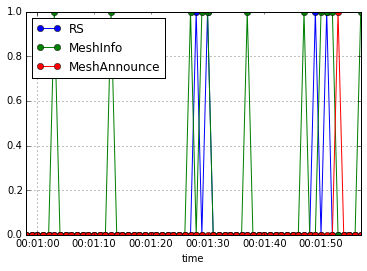

In [268]:
# this file has: idle system, then BR crashes and comes back, then 2 nodes crash and come back
d = parse_filename(filename)
pf = d[['time','RS','MeshInfo','MeshAnnounce']]
pf = pf.set_index('time')
plt.clf()
# last minute of experiement
pf.resample('1s',how='max').tail(60).fillna(0).plot(style='-o')

In [252]:
pf.h